In [4]:
import pandas as pd
import sklearn
from sklearn.linear_model import LinearRegression
import numpy as np
from pandas_summary import DataFrameSummary
import pandas_profiling as pp
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import random
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
import xgboost as xgb
import graphviz 
from sklearn.neural_network import MLPClassifier
from sklearn import tree
from pandas.util import hash_pandas_object
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.model_selection import RepeatedKFold, RepeatedStratifiedKFold, StratifiedKFold, cross_val_score
import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
%matplotlib inline
from IPython.core.debugger import set_trace
from dateutil.parser import parse

In [39]:
import os
# os.getcwd()
train_set_df_orig = pd.read_csv("port_visits_train.csv", parse_dates = ['start_time'], date_parser = parse )
train_vessels_labels_orig = pd.read_csv("vessels_labels_train.csv", index_col='vessel_id' )

# test_set_df = pd.read_csv("test_set.csv", parse_dates = ['timestamp'], date_parser = parse )

In [11]:
train_set_df_orig

,ves_id,start_time,duration_min,port_id,country,Lat,Long,port_name
0,56db7bf5e4b087b8d90a9d5e,2016-03-10 07:55:05,1641,57ce88b62e4e5fe35e7b3008,Indonesia,1.042,103.325,PT
1,56d88f20e4b0e60539c699ca,2016-03-31 07:37:35,730,5358fc78b68ca120a07dbca5,China,34.664,119.519,Lianyungang
2,56d96b7be4b0cdbda2acd645,2016-06-16 07:24:58,141,5358fc78b68ca120a07dbb33,Netherlands,51.689,4.590,Moerdijk
3,56d88f20e4b0e60539c699ca,2016-03-10 05:28:48,931,53720b4f57b2d3980edf9bfa,China,36.016,120.233,Qingdao
4,56d835ace4b09b379252ab21,2016-04-26 18:12:19,1,5358fc77b68ca120a07db099,France,47.276,-1.885,Cordemais
...,...,...,...,...,...,...,...,...
732479,56d88f20e4b0e60539c699ca,2016-03-20 23:59:11,10516,53749f7d8925ee691cb9b4ea,China,31.363,121.714,Chanxingdao
732480,56d96d97e4b0d1ae1fbebd6b,2016-06-13 06:10:45,1625,562cc82a8c0e57be50751ec1,India,18.958,72.941,Jawaharlal Nehru - Nhava Sheva
732481,56d9026ce4b0b5eaae32988f,2016-03-16 08:56:22,0,5358fc78b68ca120a07db709,Denmark,55.944,11.767,Rorvig Havn
732482,56d9026ce4b0b5eaae32988f,2016-03-16 09:32:12,29,5358fc77b68ca120a07db26a,Denmark,55.962,11.847,Hundested Havn


In [14]:
train_set_df_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732484 entries, 0 to 732483
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   ves_id        732484 non-null  object        
 1   start_time    732484 non-null  datetime64[ns]
 2   duration_min  732484 non-null  int64         
 3   port_id       732484 non-null  object        
 4   country       732171 non-null  object        
 5   Lat           732484 non-null  float64       
 6   Long          732484 non-null  float64       
 7   port_name     732444 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 44.7+ MB


In [40]:
train_vessels_labels_orig

,type,label
vessel_id,,
56d8509fe4b099a29d073a62,Container Vessel,0
56d950d9e4b0e60539c6b71d,Container Vessel,0
56d85a07e4b0fb60063969d8,Bulk Carrier,0
56d85736e4b030f1c0039905,Oil Tanker,1
56db31f9e4b02c227b748c14,Tug,0
...,...,...
56d83d91e4b0370600ea6b14,Fishing Vessel,0
56d98b06e4b036f77e70799a,Tug,0
56d8348ee4b026569c5ac90f,Oil Tanker,1


In [42]:
train_set_df_orig['label'] = train_set_df_orig['ves_id'].apply(lambda vid : train_vessels_labels_orig.loc[vid, 'label'])

In [43]:
train_set_df_orig

,ves_id,start_time,duration_min,port_id,country,Lat,Long,port_name,label
0,56db7bf5e4b087b8d90a9d5e,2016-03-10 07:55:05,1641,57ce88b62e4e5fe35e7b3008,Indonesia,1.042,103.325,PT,0
1,56d88f20e4b0e60539c699ca,2016-03-31 07:37:35,730,5358fc78b68ca120a07dbca5,China,34.664,119.519,Lianyungang,0
2,56d96b7be4b0cdbda2acd645,2016-06-16 07:24:58,141,5358fc78b68ca120a07dbb33,Netherlands,51.689,4.590,Moerdijk,0
3,56d88f20e4b0e60539c699ca,2016-03-10 05:28:48,931,53720b4f57b2d3980edf9bfa,China,36.016,120.233,Qingdao,0
4,56d835ace4b09b379252ab21,2016-04-26 18:12:19,1,5358fc77b68ca120a07db099,France,47.276,-1.885,Cordemais,0
...,...,...,...,...,...,...,...,...,...
732479,56d88f20e4b0e60539c699ca,2016-03-20 23:59:11,10516,53749f7d8925ee691cb9b4ea,China,31.363,121.714,Chanxingdao,0
732480,56d96d97e4b0d1ae1fbebd6b,2016-06-13 06:10:45,1625,562cc82a8c0e57be50751ec1,India,18.958,72.941,Jawaharlal Nehru - Nhava Sheva,0
732481,56d9026ce4b0b5eaae32988f,2016-03-16 08:56:22,0,5358fc78b68ca120a07db709,Denmark,55.944,11.767,Rorvig Havn,0
732482,56d9026ce4b0b5eaae32988f,2016-03-16 09:32:12,29,5358fc77b68ca120a07db26a,Denmark,55.962,11.847,Hundested Havn,0


In [44]:
train_set_df_orig[train_set_df_orig['ves_id'] == '56d8348ae4b02a0dec522fd6']

,ves_id,start_time,duration_min,port_id,country,Lat,Long,port_name,label
52633,56d8348ae4b02a0dec522fd6,2016-01-13 12:13:10,2068,551400d4001ecfd14d4af881,SaudiArabia,26.937,50.054,Ju'aymah Crude and LPG Terminals,1
52634,56d8348ae4b02a0dec522fd6,2016-03-23 05:58:37,0,5523b39459de2ed24dc2be6b,Venezuela,10.138,-64.828,Jose Petroterminal TAECJ,1
216107,56d8348ae4b02a0dec522fd6,2016-04-30 11:18:29,3945,5358fc78b68ca120a07dbd17,India,22.483,69.676,Vadinar,1
398599,56d8348ae4b02a0dec522fd6,2016-05-16 09:09:45,1179,551400d4001ecfd14d4af881,SaudiArabia,26.937,50.054,Ju'aymah Crude and LPG Terminals,1
398600,56d8348ae4b02a0dec522fd6,2016-05-13 20:59:29,2112,553ca9a5d4e6a49b3fb0d1e0,Kuwait,29.136,48.303,Mina Al Ahmadi,1


# EDA

## Initial examination of the raw data ##

**Unique vessels**

In [26]:
uniqe_ves_ids_train_orig = np.unique(train_set_df_orig.ves_id)
len(uniqe_ves_ids_train_orig)

21122

In [27]:
len(train_vessels_labels_orig)

21642

In [29]:
labels_vess_ids_intersect = set(uniqe_ves_ids_train_orig).intersection(train_vessels_labels_orig.vessel_id)
labels_vess_ids_diff = set(train_vessels_labels_orig.vessel_id ).difference(uniqe_ves_ids_train_orig)
print(f"There are {len(labels_vess_ids_intersect)} vess_ids appearing both in the train df and lables df")
print(f"There are {len(labels_vess_ids_diff)} vess_ids appearing in the lables df but not in the labels_vess_ids_diff")

There are 21122 vess_ids appearing both in the train df and lables df
There are 520 vess_ids appearing in the lables df but not in the labels_vess_ids_diff


**Unique ports**

In [48]:
num_unique_ports_in_train = len(np.unique(train_set_df_orig.port_id.dropna()))
print(f"there are {num_unique_ports_in_train} unique ports in the train set")

there are 3590 unique ports in the train set


**The distribution of the labels is around 13.7% 1 (Tanker) and 86.3% 0 (not a tanker)**

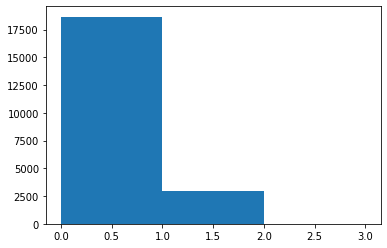

In [30]:
y_train_raw = train_vessels_labels_orig.label
counts = plt.hist(y_train_raw, bins =  [0,1,2,3] )

In [31]:
counts[0]/counts[0].sum()*100

array([86.22585713, 13.77414287,  0.        ])

In [ ]:
train_vessels_labels_orig
counts = plt.hist(y_train_raw, bins =  [0,1,2,3] )

## Duration distribution as a function of the vessel type ##

**What's the subset of ports visited by tankers**

In [57]:
tankers_ports_set = set(train_set_df_orig['port_id'][train_set_df_orig['label']==1])
print("There are {} ports visited by tankers, which are\
 {:0.2f}% of the overall ports".format(len(tankers_ports_set), len(tankers_ports_set)/num_unique_ports_in_train*100))

There are 1652 ports visited by tankers, which are 46.02% of the overall ports


**Durations distribution per port**

There were 3 tankers visits and 22 non-tanker visits to port 57b42870c94a74d24170f1af


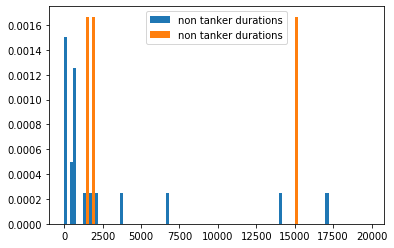

In [108]:
ports_lst = list(tankers_ports_set)
# curr_port = next(iter(tankers_ports_set))
curr_port = ports_lst[279]
curr_port_visits = train_set_df_orig[train_set_df_orig['port_id'] == curr_port]
curr_port_tanker_visits_durations = curr_port_visits[curr_port_visits['label']==1]['duration_min']
curr_port_non_tanker_visits_durations = curr_port_visits[curr_port_visits['label']==0]['duration_min']
print(f"There were {len(curr_port_tanker_visits_durations)} tankers visits and {len(curr_port_non_tanker_visits_durations)} non-tanker visits to port {curr_port}")
fig_visits, ax_visits = plt.subplots()
bins = np.arange(0,20000, 200)
ax_visits.hist(curr_port_non_tanker_visits_durations, bins=bins, density=True, label = "non tanker durations")
ax_visits.hist(curr_port_tanker_visits_durations,  bins=bins, density=True, label = "non tanker durations")
plt.legend()


**Durations distribution per vessel**

In [119]:
tanker_grouped = train_set_df_orig[train_set_df_orig['label']==1].groupby('ves_id')
tanker_grouped_iter = iter(tanker_grouped)
non_tanker_grouped = train_set_df_orig[train_set_df_orig['label']==0].groupby('ves_id')
non_tanker_grouped_iter = iter(non_tanker_grouped)

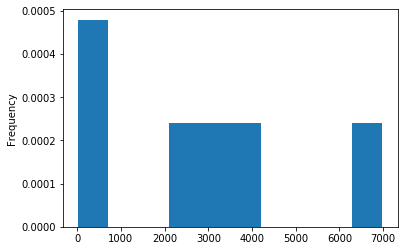

In [162]:
curr_tanker_df = next(tanker_grouped_iter)[1]
curr_tanker_df['duration_min'].plot.hist(density = True)

# non_tanker_grouped.get_group('56d8fabbe4b00724c0f7520b')['duration_min'].plot.hist()

In [178]:
curr_tanker_df['start_time']

144792   2016-04-01 15:55:48
144794   2016-02-17 10:04:13
144795   2016-03-17 05:20:43
144796   2016-04-01 05:31:17
144814   2016-04-09 12:35:47
148494   2016-04-02 12:54:49
Name: start_time, dtype: datetime64[ns]

In [181]:
curr_tanker_df['start_time'].max() - curr_tanker_df['start_time'].min()
# curr_tanker_df['start_time'].min()

Timedelta('52 days 02:31:34')

In [188]:
sorted_ts = curr_tanker_df['start_time'].sort_values()
deltas = sorted_ts[1:] - sorted_ts[:-1]

In [211]:
sorted_ts[1:]

144795   2016-03-17 05:20:43
144796   2016-04-01 05:31:17
144792   2016-04-01 15:55:48
148494   2016-04-02 12:54:49
144814   2016-04-09 12:35:47
Name: start_time, dtype: datetime64[ns]

In [210]:
(sorted_ts.iloc[1] - sorted_ts.iloc[0])#.astype('timedelta64[ns]')

Timedelta('28 days 19:16:30')

In [190]:
sorted_ts

144794   2016-02-17 10:04:13
144795   2016-03-17 05:20:43
144796   2016-04-01 05:31:17
144792   2016-04-01 15:55:48
148494   2016-04-02 12:54:49
144814   2016-04-09 12:35:47
Name: start_time, dtype: datetime64[ns]

In [209]:
deltas = sorted_ts.values[1:] - sorted_ts.values[:-1]
deltas[0].astype('timedelta64[D]')
deltas[0].astype('Timedelta')

TypeError: data type "Timedelta" not understood

In [226]:
tmp = [1,2,3]
tmp += ([4,5,6])
tmp

[1, 2, 3, 4, 5, 6]

**Durations distribution per class**

1070.0
498.0


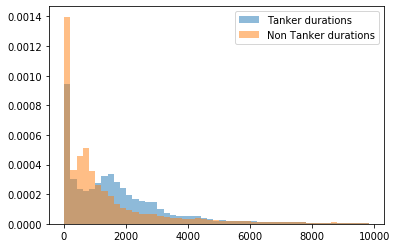

In [171]:
all_tanker_durations = train_set_df_orig[train_set_df_orig['label']==1]['duration_min']
all_non_tanker_durations = train_set_df_orig[train_set_df_orig['label']==0]['duration_min']
fig_durations,ax_durations = plt.subplots()
durations_bins = np.arange(10,10000, 200)
ax_durations.hist(all_tanker_durations, bins = durations_bins, density=True, label = 'Tanker durations', alpha=0.5)
ax_durations.hist(all_non_tanker_durations, bins = durations_bins, density=True, label = 'Non Tanker durations', alpha=0.5)
plt.legend()
print(np.median(all_tanker_durations.values))
print(np.median(all_non_tanker_durations.values))

**Num samples and overall series duration per vessel**

In [267]:
train_orig_grouped = train_set_df_orig.groupby('ves_id')


In [288]:
per_ves_ts_len_tanker = []
per_ves_ts_duration_tanker = []
overall_deltas_tanker = np.array([])
per_ves_ts_len_non_tanker = []
per_ves_ts_duration_non_tanker = []
overall_deltas_non_tanker = np.array([])

for vid, vdf in train_orig_grouped:
#     print(vid)
    is_tanker = vdf.iloc[0]['label'] == 1
    per_ves_ts_len  = per_ves_ts_len_tanker if is_tanker else per_ves_ts_len_non_tanker
    per_ves_ts_len.append(len(vdf))
    sorted_ts = vdf['start_time'].sort_values().values
    deltas = sorted_ts[1:] - sorted_ts[:-1]
    if is_tanker:
        overall_deltas_tanker = np.append(overall_deltas_tanker, deltas.astype('timedelta64[m]').astype('int'))
    else:
        overall_deltas_non_tanker = np.append(overall_deltas_non_tanker, deltas.astype('timedelta64[m]').astype('int'))
    per_ves_ts_duration = per_ves_ts_duration_tanker if is_tanker else per_ves_ts_duration_non_tanker
    per_ves_ts_duration.append(sorted_ts[-1]-sorted_ts[0])
    

In [289]:
overall_deltas_tanker

array([19337., 44039., 32045., ...,  2005.,  6043.,  6815.])

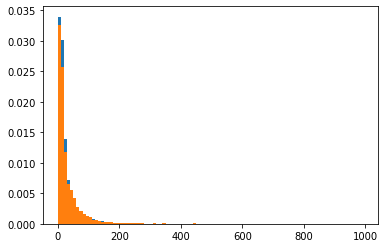

In [273]:
fig_ts_len, ax_ts_len = plt.subplots()
ax_ts_len.hist(per_ves_ts_len_tanker, bins=np.arange(0,1000,10), label='Tanker', density=True);
ax_ts_len.hist(per_ves_ts_len_non_tanker, bins=np.arange(0,1000,10), label='Non Tanker', density=True);

In [262]:
min(per_ves_ts_len)

1

In [249]:
np.array(per_ves_ts_duration).astype('timedelta64[m]').astype('int')

array([250356, 148235, 252381, ...,   1542,      0,      0])

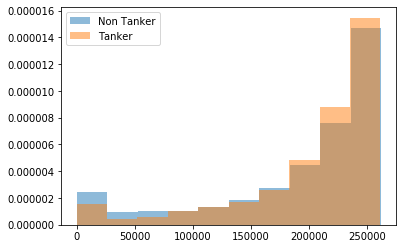

In [294]:
fig_ts_duration, ax_ts_duration = plt.subplots()
ax_ts_duration.hist(np.array(per_ves_ts_duration_non_tanker).astype('timedelta64[m]').astype('int'), label='Non Tanker', density=True, alpha=0.5);
ax_ts_duration.hist(np.array(per_ves_ts_duration_tanker).astype('timedelta64[m]').astype('int'), label='Tanker', density=True, alpha=0.5);

ax_ts_duration.legend()
# plt.hist(np.array(per_ves_ts_duration).astype('timedelta64[m]').astype('int'), density=True);

fig_ts_deltas, ax_ts_deltas = plt.subplots()
ax_ts_deltas.hist(overall_deltas_non_tanker,  label='Non Tanker', density=True, bins=np.arange(0,10000,100), alpha=0.5 ); 
ax_ts_deltas.hist(overall_deltas_tanker,  label='Tanker', density=True, bins=np.arange(0,10000,100), alpha=0.5 ); 
ax_ts_deltas.legend()

In [280]:
overall_deltas

array([], dtype=float64)

# Features engineering

In [ ]:
#Plot a vessel timeseries
def plot_vessel_timeline(vessel_id, extracted_features = None, plot_ax = None):
    if plot_ax is None:
        fig_p, ax_p = plt.subplots()
    else:
        ax_p = plot_ax
    
    curr_patient_df = train_orig_grouped.get_group(vessel_id)
    first_timestamp = curr_patient_df['timestamp'].iloc[0]
    curr_patient_df.index = list(map(lambda ts : (ts -first_timestamp).total_seconds()*1000, curr_patient_df['timestamp']))
    curr_patient_df[['measurement_x', 'measurement_y', 'measurement_z']].plot(ax=ax_p)
    if extracted_features is not None:
        coefs = extracted_features[:9].reshape(3,3).T
        x_regr = curr_patient_df.index.values
        x_mat = np.array([np.ones(len(x_regr)), x_regr, x_regr*x_regr ]).T
        curr_patient_df_approx = pd.DataFrame( x_mat.dot(coefs), 
                                              columns = ['measurement_x_regr', 'measurement_y_regr', 'measurement_z_regr'], 
                                                index = curr_patient_df.index
                                             )
        curr_patient_df_approx[['measurement_x_regr', 'measurement_y_regr', 'measurement_z_regr']].plot(ax=ax_p, style='--')
    ax_p.set_title(f"Patient {patient_id} timeseries")
    ax_p.set_xlabel("time from first timestamp (ms)")
    return len(curr_patient_df), ax_p


In [ ]:
def extract_time_series

#Converts the 
def extract_features(in_df: pd.DataFrame) -> pd.DataFrame:
    #TODO: input sanity checks   
    X = []
    y = []
    iter_over = in_dfs.groupby('patient_id') if type(in_dfs) ==  pd.DataFrame else in_dfs
    for _,patient_df in iter_over:
        extracted_features = extract_single_patient_features( patient_df, extraction_scheme, ts_handling_scheme, add_avg_dists )
     
#         print(f"Appending features of shape {extracted_features.shape}")
        X.append(extracted_features )
#         print(np.array(X).shape)
#         if len(X) == 388:
#             set_trace()
        if 'label' in patient_df:
            y.append(patient_df['label'].iloc[0])
    features_names = ['meas_{}_a{}'.format(i,j) for i in ['x', 'y', 'z'] for j in range(3)]
    intersection_names = ['intersect_x_y_1', 'intersect_x_y_2', 'intersect_x_z_1', 'intersect_x_z_2',  'intersect_y_z_1', 'intersect_y_z_2']
    avg_dist_names = ['avg_dist_x_y', 'avg_dist_x_z', 'avg_dist_y_z']
    
    all_features_names = features_names + intersection_names
    if add_avg_dists:
        all_features_names += avg_dist_names
    
    return np.array(X), np.array(y),  all_features_names

# Some experiments #

In [17]:
import gmplot

# Create the map plotter:
apikey = '' # (your API key here)
gmap = gmplot.GoogleMapPlotter(37.766956, -122.448481, 14, apikey=apikey)

# Mark a hidden gem:
gmap.marker(37.770776, -122.461689, color='cornflowerblue')

# Highlight some attractions:
attractions_lats, attractions_lngs = zip(*[
    (37.769901, -122.498331),
    (37.768645, -122.475328),
    (37.771478, -122.468677),
    (37.769867, -122.466102),
    (37.767187, -122.467496),
    (37.770104, -122.470436)
])
gmap.scatter(attractions_lats, attractions_lngs, color='#3B0B39', size=40, marker=False)

# Outline the Golden Gate Park:
golden_gate_park = zip(*[
    (37.771269, -122.511015),
    (37.773495, -122.464830),
    (37.774797, -122.454538),
    (37.771988, -122.454018),
    (37.773646, -122.440979),
    (37.772742, -122.440797),
    (37.771096, -122.453889),
    (37.768669, -122.453518),
    (37.766227, -122.460213),
    (37.764028, -122.510347)
])
gmap.polygon(*golden_gate_park, color='cornflowerblue', edge_width=10)

# Draw the map to an HTML file:
gmap.draw('map.html')

In [19]:
import os
os.system('map.html')

0

TODO:
    * IMPORTANT!! Remove duplicates!!!
    * Distance and time gap between successive ports.
    * Has visited a single non-tanker port.
    * Typical duration distribution: per tanker, per port. percentiles of distribution as features.